# Introduction
State notebook purpose here

### Imports
Import libraries and write settings here.

In [1]:
# Data manipulation
import pandas as pd
import numpy as np
import vaex

# Options for pandas
# No warnings about setting value on copy of slice
pd.options.mode.chained_assignment = None
pd.options.display.max_columns = 600
pd.options.display.max_rows = 30

# Display all cell outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

from IPython import get_ipython
ipython = get_ipython()

# autoreload extension
if 'autoreload' not in ipython.extension_manager.loaded:
    %load_ext autoreload

%autoreload 2

# Visualizations
import matplotlib.pyplot as plt
from matplotlib.transforms import TransformedBbox
# Set default font size
plt.rcParams['font.size'] = 24
import seaborn as sb
# Set default font size
sb.set(font_scale = .8)
custom_style = {'axes.labelcolor': 'black',
                'xtick.color': 'black',
                'ytick.color': 'black'}
sb.set_style("white", rc=custom_style)
plt.rc('text', usetex=True)


# only show last output
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "last"

# Interactive Visualizations
# import plotly.plotly as py
# import plotly.graph_objs as go
# from plotly.offline import iplot, init_notebook_mode
# init_notebook_mode(connected=True)

# import cufflinks as cf
# cf.go_offline(connected=True)
# icf.set_config_file(theme='white')

# Analysis/Modeling
Do work here

In [2]:
in_filename = 'data/ALLFAMS_ROTA_counts_pre.hd5'
df = vaex.open(in_filename)

In [3]:
def annotate_yranges(groups, ax=None, dx=None):
    """
    Annotate a group of consecutive yticklabels with a group name.

    Arguments:
    ----------
    groups : dict
        Mapping from group label to an ordered list of group members.
    ax : matplotlib.axes object (default None)
        The axis instance to annotate.
    """
    if ax is None:
        ax = plt.gca()

    label2obj = {ticklabel.get_text(
    ): ticklabel for ticklabel in ax.get_yticklabels()}

    for ii, (group, members) in enumerate(groups.items()):
        first = members[0]
        last = members[-1]

        bbox0 = _get_text_object_bbox(label2obj[first], ax)
        bbox1 = _get_text_object_bbox(label2obj[last], ax)

        set_yrange_label(group,
                         bbox0.y0 + bbox0.height/2,
                         bbox1.y0 + bbox1.height/2,
                         min(bbox0.x0, bbox1.x0),
                         dx=dx,
                         ax=ax)


def set_yrange_label(label, ymin, ymax, x, ax=None, dx=None, *args, **kwargs):
    """
    Annotate a y-range.

    Arguments:
    ----------
    label : string
        The label.
    ymin, ymax : float, float
        The y-range in data coordinates.
    x : float
        The x position of the annotation arrow endpoints in data coordinates.
    dx : float (default -0.5)
        The offset from x at which the label is placed.
    ax : matplotlib.axes object (default None)
        The axis instance to annotate.
    """

    if not ax:
        ax = plt.gca()

    if dx == None:
        xmin, xmax = ax.get_xlim()
        dx = (xmax - xmin) / -10.
    else:
        dx = dx
    dy = ymax - ymin
    props = dict(connectionstyle='angle, angleA=90, angleB=180, rad=0',
                 arrowstyle='-',
                 # shrinkA=10,
                 # shrinkB=10,
                 lw=1, color="k")
    ax.annotate(label,
                xy=(x, ymin),
                xytext=(x+dx, ymin + dy/2),
                annotation_clip=False,
                arrowprops=props,
                va="center", ha="right",
                *args, **kwargs,
    )
    ax.annotate(label,
                xy=(x, ymax),
                xytext=(x+dx, ymin + dy/2),
                annotation_clip=False,
               arrowprops=props,
                va="center", ha="right",
                *args, **kwargs,
    )


def _get_text_object_bbox(text_obj, ax):
    # https://stackoverflow.com/a/35419796/2912349
    transform = ax.transData.inverted()
    # the figure needs to have been drawn once, otherwise there is no renderer?
    bb = text_obj.get_window_extent(renderer=ax.get_figure().canvas.draw());
    # handle canvas resizing
    return TransformedBbox(bb, transform)



In [4]:
# AA freqs overall; buried; exposed, H, T, E (AA_diff, three_char_AA_1, three_char_AA_2)

SS_E_subset = df[(df.SS_DSSP_1.str.equals("E")) &
                 (df.SS_DSSP_2.str.equals("E"))]
SS_H_subset = df[(df.SS_DSSP_1.str.equals("H")) &
                 (df.SS_DSSP_2.str.equals("H"))]
SS_T_subset = df[(df.SS_DSSP_1.str.equals("T")) &
                 (df.SS_DSSP_2.str.equals("T"))]
exposed_subset = df[(df.RASA_Tien_1 >= .25) & (df.RASA_Tien_2 >= .25)]
buried_subset = df[(df.RASA_Tien_1 < .25) & (df.RASA_Tien_2 < .25)]

ordered_AAs = ['GLY', 'ALA', 'PRO', 'CYS', 'MET', 'ILE', 'LEU', 'VAL', 'PHE', 'TRP',
               'TYR', 'HIS', 'ARG', 'LYS', 'GLN', 'ASN', 'ASP', 'GLU', 'SER', 'THR']

# RAM55_lax2 rota frequencies
# Dayhoff-normalized
path = "data/RAM55_lax2_rotamers_adj_shared_count_matrix.merged.Dayhoff_norm.frequencies"
RAM55lax2_ROTA_freqs = pd.read_csv(path, sep="\t", header=0, index_col=None)

# ROTAs sorted by pysicochemical properties
ordered_ROTAs = ['GLY', 'ALA'] + ['PRO1', 'PRO2']
trios = ['CYS', 'MET', 'ILE', 'LEU', 'VAL', 'PHE', 'TRP', 'TYR',
         'HIS', 'ARG', 'LYS', 'GLN', 'ASN', 'ASP', 'GLU', 'SER', 'THR']


def make_ROTA_trios(AAs):
    out = []
    for AA in AAs:
        out.extend([AA + n for n in ["1", "2", "3"]])
    return out


ordered_ROTAs = ordered_ROTAs + make_ROTA_trios(trios)

AA_dict_low = {
    'carboxyamine': ['GLN', 'ASN'],
    'positive': ['HIS', 'ARG', 'LYS'],
    'hydroxyl': ['SER', 'THR'],
    'aliphatic': ['ILE', 'LEU', 'VAL'],
    'aromatic': ['PHE', 'TRP', 'TYR'],
    'negative': ['ASP', 'GLU']}

AA_dict_high = {
    "hydrophobic": ['GLY', 'ALA', 'PRO', 'CYS', 'MET', 'ILE', 'LEU', 'VAL', 'PHE'],
    "polar": ['TRP',
               'TYR', 'HIS', 'ARG', 'LYS', 'GLN', 'ASN', 'ASP', 'GLU', 'SER', 'THR']
}

# to annotate rotamer states occording to biochemical properties
ROTA_dict_low = {}
for k in AA_dict_low.keys():
    ROTA_dict_low[k] = make_ROTA_trios(AA_dict_low[k])

ROTA_dict_high = {
    "hydrophobic": ['GLY', 'ALA', 'PRO1', 'PRO2'] + make_ROTA_trios(['CYS', 'MET', 'ILE', 'LEU', 'VAL', 'PHE']),
    "polar": make_ROTA_trios(['TRP','TYR', 'HIS', 'ARG', 'LYS', 'GLN', 'ASN', 'ASP', 'GLU', 'SER', 'THR'])
}


ROTA_conserved_subset = df[df.ROTA_diff == False]
ROTA_non_conserved_subset = df[df.ROTA_diff == True]

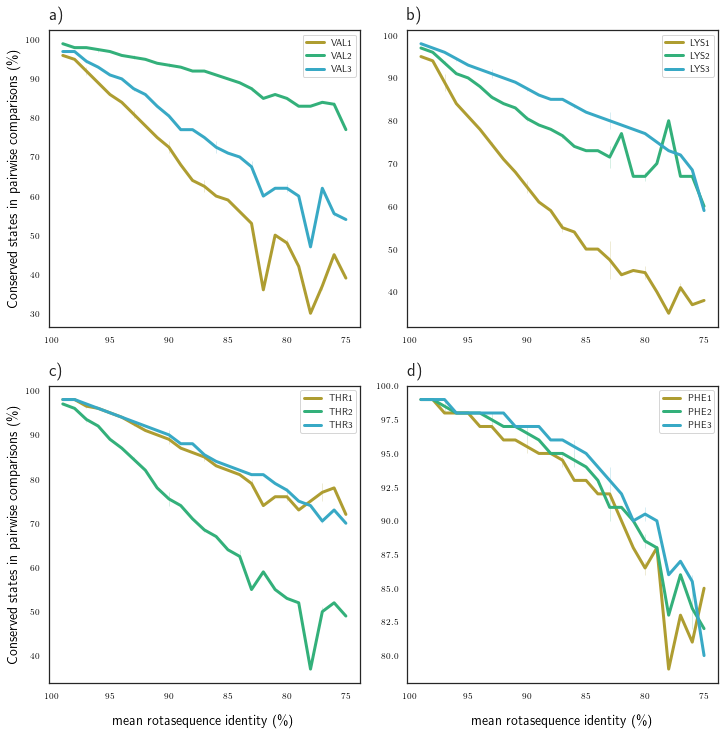

In [10]:
palette = sb.color_palette("husl", 5)[1:]
color_dict = dict(zip(("1", "2", "3"), palette))

fig, axes = plt.subplots(2, 2, figsize=(12, 12))
plt.subplots_adjust(wspace=.15)

# conservation divergence across substates of the same AA
selected_AA = ['VAL', 'LYS', 'THR', 'PHE']
i = 0
for ax, label, AA, in zip(axes.flatten(), ("a)", "b)", "c)", "d)"), selected_AA):
    for ROTA in [AA + n for n in ("1", "2", "3")]:
        # conserved/non-conserved sites for ROTA
        non_conserved = ROTA_non_conserved_subset[ROTA_non_conserved_subset.four_char_rota_1==ROTA].count(
            "pair_id", binby="shared_rotaseq_identity", shape=32)
        conserved = ROTA_conserved_subset[ROTA_conserved_subset.four_char_rota_1==ROTA].count(
            "pair_id", binby="shared_rotaseq_identity", shape=32)

        # calc percentage of conserved for each bin
        conserved_percent = conserved / \
            (conserved + non_conserved) * 100
    
        # calc mean shared_rotaseq_identity for each bin
        mean_rotaseq_identity = ROTA_conserved_subset[ROTA_conserved_subset.four_char_rota_1==ROTA].mean(
            "shared_rotaseq_identity", binby="shared_rotaseq_identity", shape=32) * 100
        conserved_percent = [int(f) for f in conserved_percent]
        mean_rotaseq_identity = [int(f) for f in mean_rotaseq_identity]
        
        chi_1 = [ROTA[-1]] * len(mean_rotaseq_identity)
        
        sb.lineplot(x=mean_rotaseq_identity,
                    y=conserved_percent,
                    hue=chi_1,
                    palette=color_dict,
                    label=ROTA,
                    linewidth=3,
                    ax=ax);
        handles, labels = ax.get_legend_handles_labels();
        labels = labels[0::2]
        handles = handles[0::2]
        ax.legend(handles, labels, loc="upper right");
    
    ax.set_ylabel("");
    ax.set_xlabel("");
    if i == 0 or i == 2:
        ax.set_ylabel("Conserved states in pairwise comparisons (\%)", fontsize=14);
    if i >= 2:
        ax.set_xlabel("mean rotasequence identity (\%)", fontsize=14, labelpad=15);
    ax.set_title(label, loc="left", fontsize=18, pad=10);
    ax.invert_xaxis()
    i+=1
    
s = "-".join(selected_AA)
fig.savefig(f"figures/RAM55annot_{s}_conservation_by_seqid.pdf", format="pdf",
            bbox_inches='tight', dpi=fig.dpi)

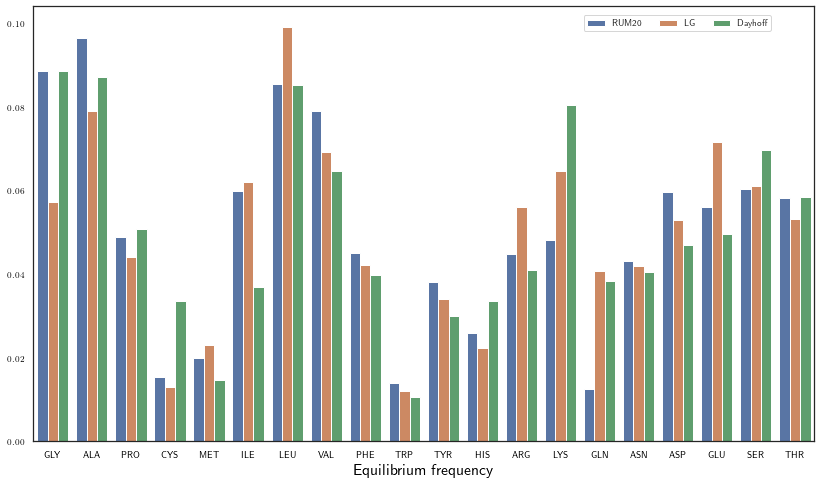

In [10]:
# RAM55_lax2 AA frequencies
# unbiased by residue-level structure quality filtering
path = "data/RAM55_lax2_restype_adj_shared_count_matrix.merged.frequencies"
RAM55lax2_AA_freqs = pd.read_csv(path, sep="\t", header=0, index_col=None)

# LG AA frequencies from PAML's lg.dat
path = "data/LG_20x20.frequencies"
LG_AA_freqs = pd.read_csv(path, sep="\t", header=0, index_col=None)
# Dayhoff 1978 AA frequencies
path = "data/DAYHOFF_20x20.freqs"
DAYHOFF_AA_freqs = pd.read_csv(path, sep="\t", header=0, index_col=None)


# AAs sorted by pysicochemical properties
ordered_AAs = ['GLY', 'ALA', 'PRO', 'CYS', 'MET', 'ILE', 'LEU', 'VAL', 'PHE', 'TRP',
               'TYR', 'HIS', 'ARG', 'LYS', 'GLN', 'ASN', 'ASP', 'GLU', 'SER', 'THR']
# reorder freqs arrays
ordered_RAM55lax2_AA_freqs = [
    RAM55lax2_AA_freqs[aa].values[0] for aa in ordered_AAs]
ordered_LG_AA_freqs = [LG_AA_freqs[aa].values[0] for aa in ordered_AAs]
ordered_DAYHOFF_AA_freqs = [
    DAYHOFF_AA_freqs[aa].values[0] for aa in ordered_AAs]


def calc_AA_freqs(df):
    # compute AA counts
    all_AA_counts = df.three_char_AA_1.value_counts() + df.three_char_AA_2.value_counts()
    all_AA_tot = all_AA_counts.sum()
    all_AA_freqs = all_AA_counts / all_AA_tot  # calc AA frequencies
    # reorder array
    ordered_all_freqs = [all_AA_freqs.loc[aa]
                         if aa in all_AA_freqs.index else 0. for aa in ordered_AAs]
    return ordered_all_freqs


# get AA equilibrium frequencies (empirical) for RAM55annot
ordered_all_freqs = calc_AA_freqs(df)
# save the RAM55annot AA freqs to file
ordered_all_freqs_df = pd.DataFrame.from_records(
    [ordered_all_freqs], columns=ordered_AAs)
ordered_all_freqs_df.to_csv(
    "data/RAM55annot_AA.frequencies", sep="\t", index=False)

# generate a seaborn-friendly dataframe
plot_data = {'Amino acid': ordered_AAs + ordered_AAs + ordered_AAs,
             'Frequency': ordered_all_freqs +  ordered_LG_AA_freqs \
             + ordered_DAYHOFF_AA_freqs,
             'dataset': ["RUM20"]*20 + ["LG"]*20 + ["Dayhoff"]*20}
plot_df = pd.DataFrame.from_dict(plot_data)

fig, ax = plt.subplots(1, figsize=(14, 8))
sb.barplot(x="Amino acid", 
           y="Frequency", 
           hue="dataset", 
           data=plot_df, ax=ax)

ax.set_ylabel("")
ax.set_xlabel("Equilibrium frequency", fontsize=16)
plt.setp(ax.get_yticklabels(which='major'), ha="right")
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles, labels, bbox_to_anchor=(.95, .99), ncol=3)
fig.savefig(f"figures/RUM20_AA_frequencies_barplot.pdf", format="pdf",
            bbox_inches='tight', dpi=fig.dpi)
plt.show()

In [46]:
# reorder freqs array
ordered_RAM55lax2_ROTA_freqs = [
    RAM55lax2_ROTA_freqs[ROTA].values[0] for ROTA in ordered_ROTAs]

# same as the AA function


def calc_ROTA_freqs(df):
    # compute ROTA counts
    all_ROTA_counts = df.four_char_rota_1.value_counts() + \
        df.four_char_rota_2.value_counts()
    all_ROTA_tot = all_ROTA_counts.sum()
    all_ROTA_freqs = all_ROTA_counts / all_ROTA_tot  # calc ROTA frequencies
    # reorder array
    ordered_all_freqs = [all_ROTA_freqs.loc[ROTA]
                         if ROTA in all_ROTA_freqs.index else 0. for ROTA in ordered_ROTAs]
    return ordered_all_freqs


# get ROTA equilibrium frequencies (empirical) for RAM55annot
ordered_all_freqs = calc_ROTA_freqs(df)
# save the RAM55annot AA freqs to file
ordered_all_freqs_df = pd.DataFrame.from_records(
    [ordered_all_freqs], columns=ordered_ROTAs)
ordered_all_freqs_df.to_csv(
    "data/RAM55annot_ROTA.frequencies", sep="\t", index=False)

# generate a seaborn-friendly dataframe
plot_data = {'Rotamer state': ordered_ROTAs,
             'Frequency': ordered_all_freqs,
             'dataset': ["RAM55annot"]*len(ordered_ROTAs)}

plot_df = pd.DataFrame.from_dict(plot_data)
plot_df[r"$\chi_{1}$"] = plot_df["Rotamer state"].str[-1]
plot_df[r"$\chi_{1}$"][:2] = ["None"]*2
#plot_df["r"$\chi_{1}$"][[2,3]] = ["None"]*2

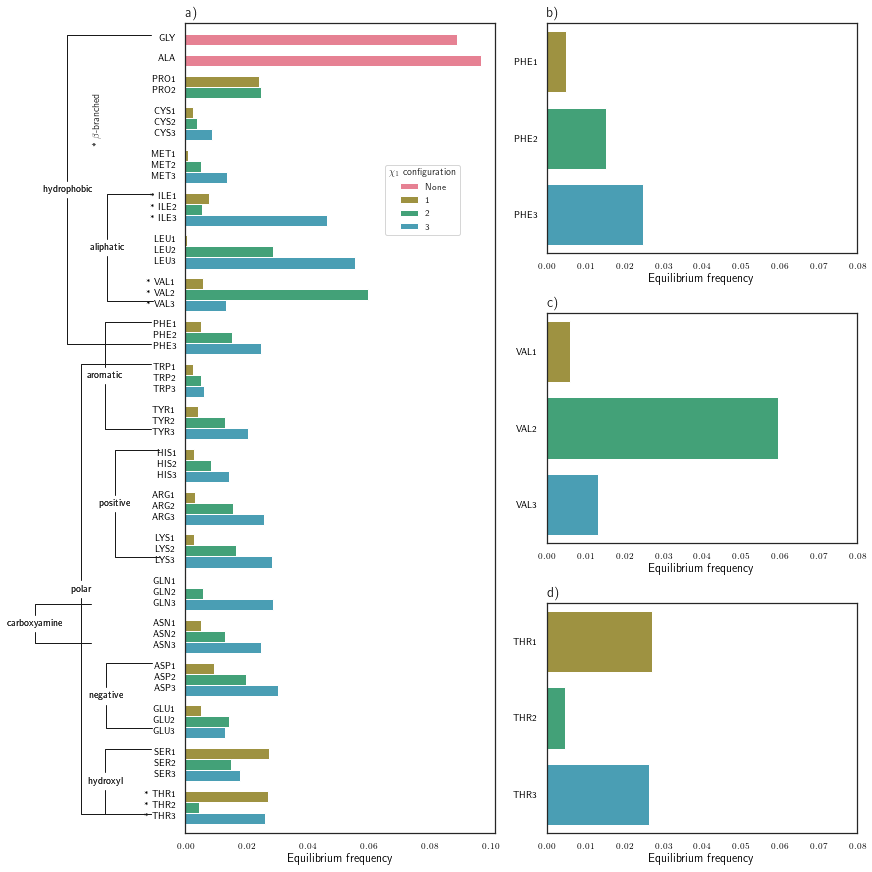

In [79]:
palette = sb.color_palette("husl", 5)

fig = plt.figure(constrained_layout=True, figsize=(12, 12))
gs = fig.add_gridspec(ncols=2, nrows=3)
ax1 = fig.add_subplot(gs[:, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[1, 1])
ax4 = fig.add_subplot(gs[2, 1])

sb.barplot(y="Rotamer state",
           x="Frequency",
           hue=r"$\chi_{1}$",
           dodge=False,
           palette=palette,
           data=plot_df, 
           ax=ax1)

# group bars from same AA
large_d = 1.5  # between AAs
small_d = .8  # between rotamers of the same AA
ax_scale = 2.9
D = [large_d, large_d, small_d, large_d]  # for ALA, GLY, PRO
D.extend([small_d, small_d, large_d] * 52)  # for all other ROTAs
D = D[:-1]
prev_y = list(ax1.containers[0])[0].get_y()  # first stackbar y coord
Y = [prev_y]
for d in D:  # reset all other bars y coords
    prev_y = prev_y + d
    Y.append(prev_y)

# one rectagle per stackbar component
for bars in ax1.containers:
    for r, y in zip(list(bars), Y):
        r.set_y(y)

ax1.set_yticks(Y)  # reset ticks

# reset axis limits
ax1.set_ylim(bottom=min(Y) - small_d, top=Y[-1]/ax_scale + small_d)
ax1.invert_yaxis()  # invert to have ALA, GLY, PRO at the top

annotate_yranges(ROTA_dict_low, ax=ax1, dx=-.01)
annotate_yranges(ROTA_dict_high, ax=ax1, dx=-.02)

# tag B-branched AAs
ylabels = [s.replace("VAL", " * VAL").replace("ILE", " * ILE").replace("THR", " * THR")
 for s in ordered_ROTAs]
ax1.set_yticklabels(ylabels, va="top", ha="right")
ax1.text(-.3, .85, r'* $\beta$-branched',
         rotation="vertical",
         transform=ax1.transAxes)

ax1.set_ylabel("")
ax1.set_xlabel("Equilibrium frequency", fontsize=12)
handles, labels = ax1.get_legend_handles_labels()
ax1.legend(handles, labels, 
           title=r"$\chi_{1}$ configuration", 
           bbox_to_anchor=(.63, .83), ncol=1)
ax.set_xlim(0, .08)
ax1.set_title("a)", loc="left", fontsize=14);

##########################################################################

selected_AAs = ["PHE", "VAL", "THR"]
axes = [ax2, ax3, ax4]
labels = ["b)", "c)", "d)"]
for aa, ax, label in zip(selected_AAs, axes, labels):
    subset = plot_df[plot_df["Rotamer state"].str.contains(aa)]
    sb.barplot(y="Rotamer state",
               x="Frequency",
               hue=r"$\chi_{1}$",
               dodge=False,
               palette=palette[1:],
               data=subset, ax=ax)
    ax.legend_.remove()
    ax.set_ylabel("")
    ax.set_xlabel("Equilibrium frequency", fontsize=12)
    ax.set_xlim(0, .08)
    ax.set_title(label, loc="left", fontsize=14);
fig.savefig(f"figures/RAM55_TOTA_frequencies_barplot.pdf", format="pdf",
            bbox_inches='tight', dpi=fig.dpi)
plt.show()

In [66]:
ax1.containers[0]

<BarContainer object of 55 artists>

In [11]:
plot_df[plot_df["Rotame§r state"].isin(["PHE1", "PHE3"])]

Rotamer state  Frequency     dataset $\chi_{1}$
19          PHE1   0.005137  RAM55annot          1
21          PHE3   0.024813  RAM55annot          3

In [31]:
# sample pairs of structure to compute RMSD
df_sample = df[['PDB_id_1', 'PDB_id_2', "shared_rotaseq_identity"]].sample(
    n=350, random_state=42)
df_sample_pd = df_sample.to_pandas_df()
df_sample_pd[df_sample_pd.PDB_id_1 != df_sample_pd.PDB_id_2].to_csv(
    "data/RAM55annot_sample_strucs.tsv", sep="\t", index=False)

In [33]:
df_sample_pd

PDB_id_1 PDB_id_2  shared_rotaseq_identity
0       5FUT     5W6O                 0.883408
1       1XZI     1XZB                 0.967105
2       4UHA     5VVN                 0.965636
3       2YVC     2D11                 0.865979
4       1O7N     1O7G                 0.980000
..       ...      ...                      ...
345     180L     180L                 0.964286
346     4I7W     4I7W                 0.982517
347     4BQ5     4BQ3                 0.943750
348     2VUU     1K6X                 0.912037
349     4OD4     4OD5                 0.822967

[350 rows x 3 columns]

In [80]:
RMSD_seqid_df = pd.read_csv("data/rmsd_rotaseqid.txt", sep="\t")
RMSD_seqid_df

PDB_id_1 PDB_id_2  shared_rotaseq_identity      RMSD  fullRMSD
0       5FUT     5W6O                 0.883408       NaN       NaN
1       1XZI     1XZB                 0.967105  0.143465  0.143465
2       4UHA     5VVN                 0.965636  0.190294  0.190294
3       2YVC     2D11                 0.865979  1.035807  1.035807
4       1O7N     1O7G                 0.980000  0.144536  0.144536
..       ...      ...                      ...       ...       ...
245     1QCI     1QCG                 0.966851  0.195708  0.195708
246     4BQ5     4BQ3                 0.943750  0.651709  0.651709
247     4BQ5     4BQ3                 0.943750  0.651709  0.651709
248     2VUU     1K6X                 0.912037  0.589104  0.589104
249     4OD4     4OD5                 0.822967  0.552079  0.552079

[250 rows x 5 columns]

In [87]:
sb.regplot(x=RMSD_seqid_df.shared_rotaseq_identity, 
           y=RMSD_seqid_df.RMSD)

RuntimeError: latex was not able to process the following string:
b'shared_rotaseq_identity'

Here is the full report generated by latex:
This is pdfTeX, Version 3.14159265-2.6-1.40.20 (TeX Live 2019) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(/Users/uperron/.matplotlib/tex.cache/66a7d5d22933ae92dec9026f9432cb43.tex
LaTeX2e <2018-12-01>
(/usr/local/texlive/2019/texmf-dist/tex/latex/base/article.cls
Document Class: article 2018/09/03 v1.4i Standard LaTeX document class
(/usr/local/texlive/2019/texmf-dist/tex/latex/base/size10.clo))
(/usr/local/texlive/2019/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/local/texlive/2019/texmf-dist/tex/latex/base/textcomp.sty
(/usr/local/texlive/2019/texmf-dist/tex/latex/base/ts1enc.def
(/usr/local/texlive/2019/texmf-dist/tex/latex/base/ts1enc.dfu)))
(/usr/local/texlive/2019/texmf-dist/tex/latex/base/inputenc.sty)
(/usr/local/texlive/2019/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/local/texlive/2019/texmf-dist/tex/latex/graphics/keyval.sty)
(/usr/local/texlive/2019/texmf-dist/tex/generic/oberdiek/ifpdf.sty)
(/usr/local/texlive/2019/texmf-dist/tex/generic/oberdiek/ifvtex.sty)
(/usr/local/texlive/2019/texmf-dist/tex/generic/ifxetex/ifxetex.sty)

Package geometry Warning: Over-specification in `h'-direction.
    `width' (5058.9pt) is ignored.


Package geometry Warning: Over-specification in `v'-direction.
    `height' (5058.9pt) is ignored.

) (./66a7d5d22933ae92dec9026f9432cb43.aux)
(/usr/local/texlive/2019/texmf-dist/tex/latex/base/ts1cmr.fd)
*geometry* driver: auto-detecting
*geometry* detected driver: dvips
! Missing $ inserted.
<inserted text> 
                $
l.14 ...ize{9.600000}{12.000000}{\sffamily shared_
                                                  rotaseq_identity}
No pages of output.
Transcript written on 66a7d5d22933ae92dec9026f9432cb43.log.




<Figure size 432x288 with 1 Axes>

# Results
Show graphs and stats here

# Conclusions and Next Steps
Summarize findings here